<a href="https://colab.research.google.com/github/dongzooo/DeepLearning_AI-TensorFlow/blob/main/1_BasicModel/Computer_Vision_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.2


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


LABEL: 0

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   1   0   0   0   0  41 188 103  54  48  43  87 168 133  16   0   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0  49 136 219 216 228 236 255 255 255 255 217 215 254 231 160  45   0   0   0   0   0]
 [  0   0   0   0   0  14 176 222 224 212 203 198 196 200 215 204 202 201 201 201 209 218 224 164   0   0   0   0]
 [  0   0   0   0   0 188 219 200 198 202 198 199 199 201 196 198 198 200 200 200 200 201 200 225  41   0   0   0]
 [  0   0   0   0  51 219 199 203 203 212 238 248 250 245 249 246 247 252 248 235 207 203 203 222 140   0   0   0]
 [  0   0   0   0 116 226 206 204 207 204 101  75  47  73  48  50  45  51  63 113 222 202 206 220 224   0   0   0]
 [  0   0   0   0 200 222 209 203 215 200   0  70  98   0 103  59  68  71  49   0 219 206 214 210 250  38   0   0]
 [  0   0   0   0 247 218 212 210 215 214   0 254 243 139 255 174 251 255 205   0 215 217 214 208 220  95   0   0]
 [  0   0   0  45 226 214 214 215 224 205   0  42 

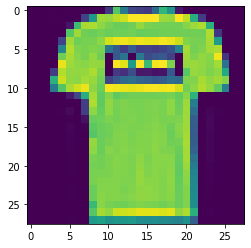

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 1

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
#픽셀은 0~255사이지만 0~1사이 값으로 훈련하면 용이하기 떄문에 255를 나눈다
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4973 - accuracy: 0.8256
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3773 - accuracy: 0.8623
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3399 - accuracy: 0.8767
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3157 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2946 - accuracy: 0.8910


In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3655 - accuracy: 0.8664


[0.3654947876930237, 0.8664000034332275]